# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot
import seaborn as sns 
%matplotlib inline

In [2]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Fetching Data

In [3]:
hotel_details = pd.read_csv('Hotel_details.csv',delimiter=',')
hotel_rooms = pd.read_csv('Hotel_Room_attributes.csv',delimiter=',')

In [4]:
hotel_details.head()

,id,hotelid,hotelname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,Source,url,curr
0,46406,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,2,https://www.booking.com/hotel/hr/bungalow-luxu...,EUR
1,46407,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,5,https://www.agoda.com/en-gb/hotel-polonia/hote...,EUR
2,46408,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,2,http://www.booking.com/hotel/it/rifugio-sass-b...,EUR
3,46409,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,5,https://www.agoda.com/en-gb/madalena-hotel/hot...,EUR
4,46410,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,2,http://www.booking.com/hotel/it/pension-morenf...,EUR


In [5]:
hotel_rooms.head()

,id,hotelcode,roomamenities,roomtype,ratedescription,guests_no,price
0,50677497,634876,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,Double Room,"Room size: 15 m²/161 ft², Shower, 1 king bed",2,149
1,50672149,8328096,Air conditioning: ;Closet: ;Fireplace: ;Free W...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",4,64
2,50643430,8323442,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,Vacation Home,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",1,103
3,50650317,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",1,225
4,50650318,7975,Air conditioning: ;Clothes rack: ;Coffee/tea m...,Standard Triple Room,"Room size: 20 m²/215 ft², Shower, 3 single beds",3,131


# Data exploration

In [6]:
hotel_details.columns

Index(['id', 'hotelid', 'hotelname', 'address', 'city', 'country', 'zipcode',
       'propertytype', 'starrating', 'latitude', 'longitude', 'Source', 'url',
       'curr'],
      dtype='object')

In [7]:
hotel_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108048 entries, 0 to 108047
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            108048 non-null  int64  
 1   hotelid       108048 non-null  int64  
 2   hotelname     108048 non-null  object 
 3   address       102955 non-null  object 
 4   city          108048 non-null  object 
 5   country       108048 non-null  object 
 6   zipcode       83486 non-null   float64
 7   propertytype  108048 non-null  object 
 8   starrating    108048 non-null  int64  
 9   latitude      108048 non-null  float64
 10  longitude     108048 non-null  float64
 11  Source        108048 non-null  int64  
 12  url           107937 non-null  object 
 13  curr          108048 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 11.5+ MB


In [8]:
hotel_rooms.columns

Index(['id', 'hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'guests_no', 'price'],
      dtype='object')

In [9]:
hotel_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131019 entries, 0 to 131018
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               131019 non-null  int64 
 1   hotelcode        131019 non-null  int64 
 2   roomamenities    127224 non-null  object
 3   roomtype         131019 non-null  object
 4   ratedescription  127224 non-null  object
 5   guests_no        131019 non-null  int64 
 6   price            131019 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.0+ MB


In [10]:
hotel_details.describe()

,id,hotelid,zipcode,starrating,latitude,longitude,Source
count,108048.00000,1.080480e+05,8.348600e+04,108048.000000,108048.000000,108048.000000,108048.000000
mean,100429.50000,1.196298e+06,4.814535e+04,3.186537,46.770001,8.345943,3.087461
std,31190.91528,2.096632e+06,9.635945e+04,0.665614,5.438123,9.119117,1.442162
min,46406.00000,3.100000e+01,0.000000e+00,2.000000,0.000000,-111.908966,2.000000
25%,73417.75000,9.402175e+04,9.920000e+03,3.000000,43.309794,1.442162,2.000000
50%,100429.50000,3.065795e+05,3.430000e+04,3.000000,46.686896,8.975729,2.000000
75%,127441.25000,1.066211e+06,6.311000e+04,4.000000,50.777548,13.661896,5.000000
max,154453.00000,9.061192e+06,9.545142e+06,4.000000,69.536102,34.408731,5.000000


In [11]:
hotel_rooms.describe()

,id,hotelcode,guests_no,price
count,1.310190e+05,1.310190e+05,131019.000000,131019.000000
mean,7.033642e+07,1.185925e+06,2.394363,142.845641
std,5.206862e+06,2.165486e+06,1.017023,52.177980
min,5.064343e+07,3.100000e+01,1.000000,40.000000
25%,6.624761e+07,8.166200e+04,2.000000,95.000000
50%,7.284985e+07,1.560250e+05,2.000000,142.000000
75%,7.429491e+07,8.281760e+05,3.000000,191.000000
max,7.507364e+07,8.971223e+06,4.000000,240.000000


# Data Cleaning and Transformation

We will reduce the data frame by taking only the columns relevent for our work

In [12]:
del hotel_details['id']
del hotel_rooms['id']
del hotel_details['zipcode']
del hotel_details['latitude']
del hotel_details['longitude']

In [13]:
hotel_details = hotel_details.dropna()
hotel_rooms = hotel_rooms.dropna()

In [14]:
hotel_details.drop_duplicates(subset='hotelid' , keep = False , inplace = True )

merge both the data frames

In [15]:
hotel = pd.merge(hotel_rooms , hotel_details , left_on = 'hotelcode' , right_on = 'hotelid' , how = 'inner')

In [16]:
hotel.columns

Index(['hotelcode', 'roomamenities', 'roomtype', 'ratedescription',
       'guests_no', 'price', 'hotelid', 'hotelname', 'address', 'city',
       'country', 'propertytype', 'starrating', 'Source', 'url', 'curr'],
      dtype='object')

In [17]:
hotel['desciption'] =hotel['roomamenities'] + hotel['ratedescription']

In [18]:
del hotel['Source']
del hotel['curr']
del hotel['hotelid']
del hotel['ratedescription']
del hotel['roomamenities']

In [19]:
hotel.describe(include='all')

,hotelcode,roomtype,guests_no,price,hotelname,address,city,country,propertytype,starrating,url,desciption
count,1.150840e+05,115084,115084.000000,115084.000000,115084,115084,115084,115084,115084,115084.000000,115084,115084
unique,NaN,6785,NaN,NaN,6676,6619,3610,29,5,NaN,6783,27075
top,NaN,Double Room,NaN,NaN,Millennium Mayfair,Main Street,London,United Kingdom,Hotels,NaN,https://www.agoda.com/en-gb/millennium-mayfair...,Air conditioning: ;Free Wi-Fi in all rooms!: ;...
freq,NaN,5891,NaN,NaN,352,363,8909,45630,113911,NaN,352,2627
mean,1.268519e+06,NaN,2.397570,142.601760,NaN,NaN,NaN,NaN,NaN,3.444719,NaN,NaN
std,2.207353e+06,NaN,1.016113,52.348771,NaN,NaN,NaN,NaN,NaN,0.619800,NaN,NaN
min,3.100000e+01,NaN,1.000000,40.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,1.022150e+05,NaN,2.000000,95.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,1.675370e+05,NaN,2.000000,141.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,1.031494e+06,NaN,3.000000,192.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN


In [20]:
#check for duplicate value

sum(hotel.duplicated())

3178

In [21]:
hotel_after_removing_duplicates = hotel.drop_duplicates()

In [22]:
sum(hotel_after_removing_duplicates.duplicated())

0

In [23]:
#check for missing values 
hotel = hotel_after_removing_duplicates.dropna()

In [24]:
hotel.describe()

,hotelcode,guests_no,price,starrating
count,1.119060e+05,111906.000000,111906.000000,111906.000000
mean,1.275319e+06,2.403562,142.328803,3.441308
std,2.212593e+06,1.016691,52.301993,0.620913
min,3.100000e+01,1.000000,40.000000,2.000000
25%,1.047470e+05,2.000000,95.000000,3.000000
50%,1.682200e+05,2.000000,140.000000,4.000000
75%,1.061084e+06,3.000000,191.000000,4.000000
max,8.971223e+06,4.000000,240.000000,4.000000


# Data Visualization 

Below graph shows the correlation heatmap between the variables 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33060\3212760476.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = hotel.corr(method="pearson")


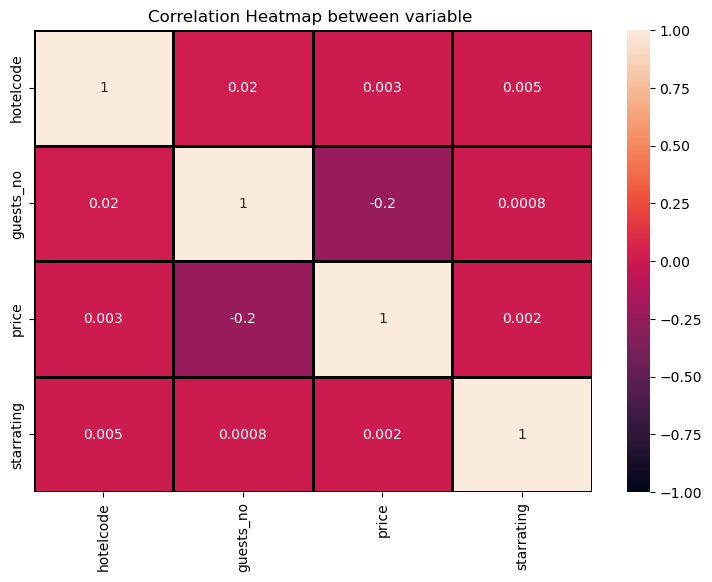

In [25]:
corr_df = hotel.corr(method="pearson")
pyplot.figure(figsize=(9,6))
heatmap = sns.heatmap(corr_df , annot=True , fmt=".1g" , vmin=-1, vmax=1 , center=0 , cmap="rocket" , linewidths=1 , linecolor='Black')
heatmap.set_title("Correlation Heatmap between variable ")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90);

Below graph shows thw Corealtion between Price of Hotel vs Star Rating

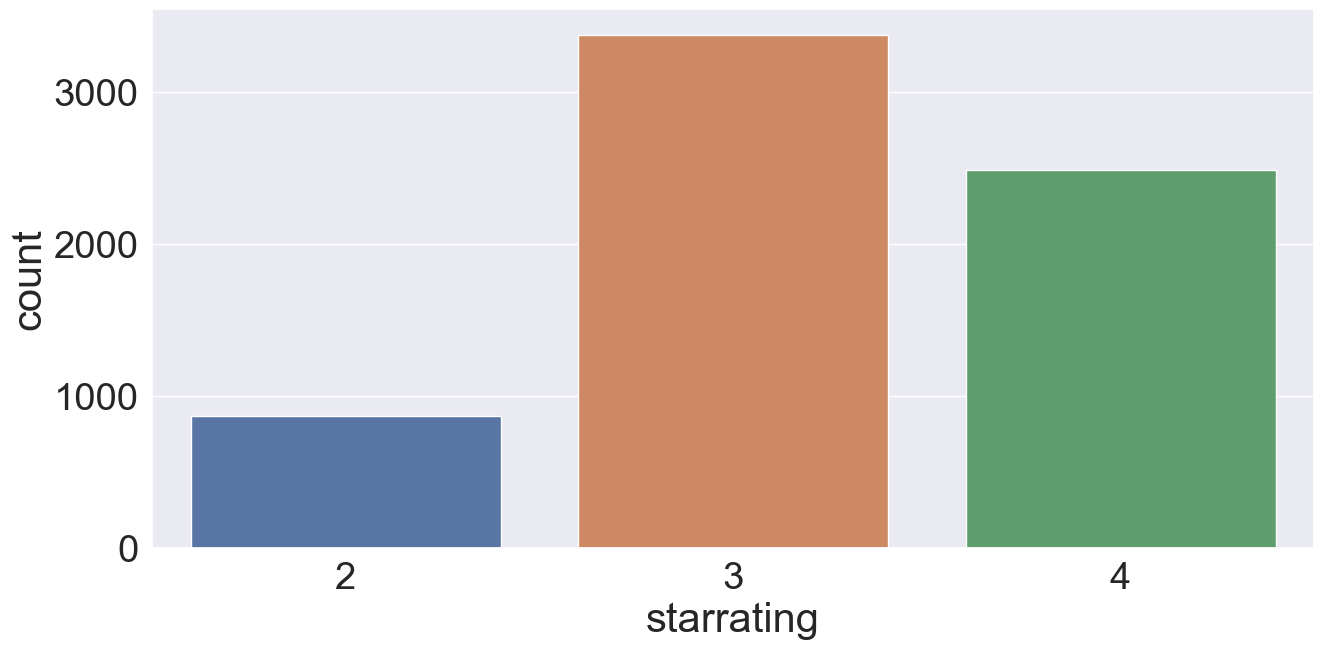

In [26]:
plot = hotel[["hotelname",'starrating']].drop_duplicates()
sns.set(font_scale=2.5)
a4_dims = (15,7)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax,x = 'starrating',data=plot);

Top 10 most booked hotels

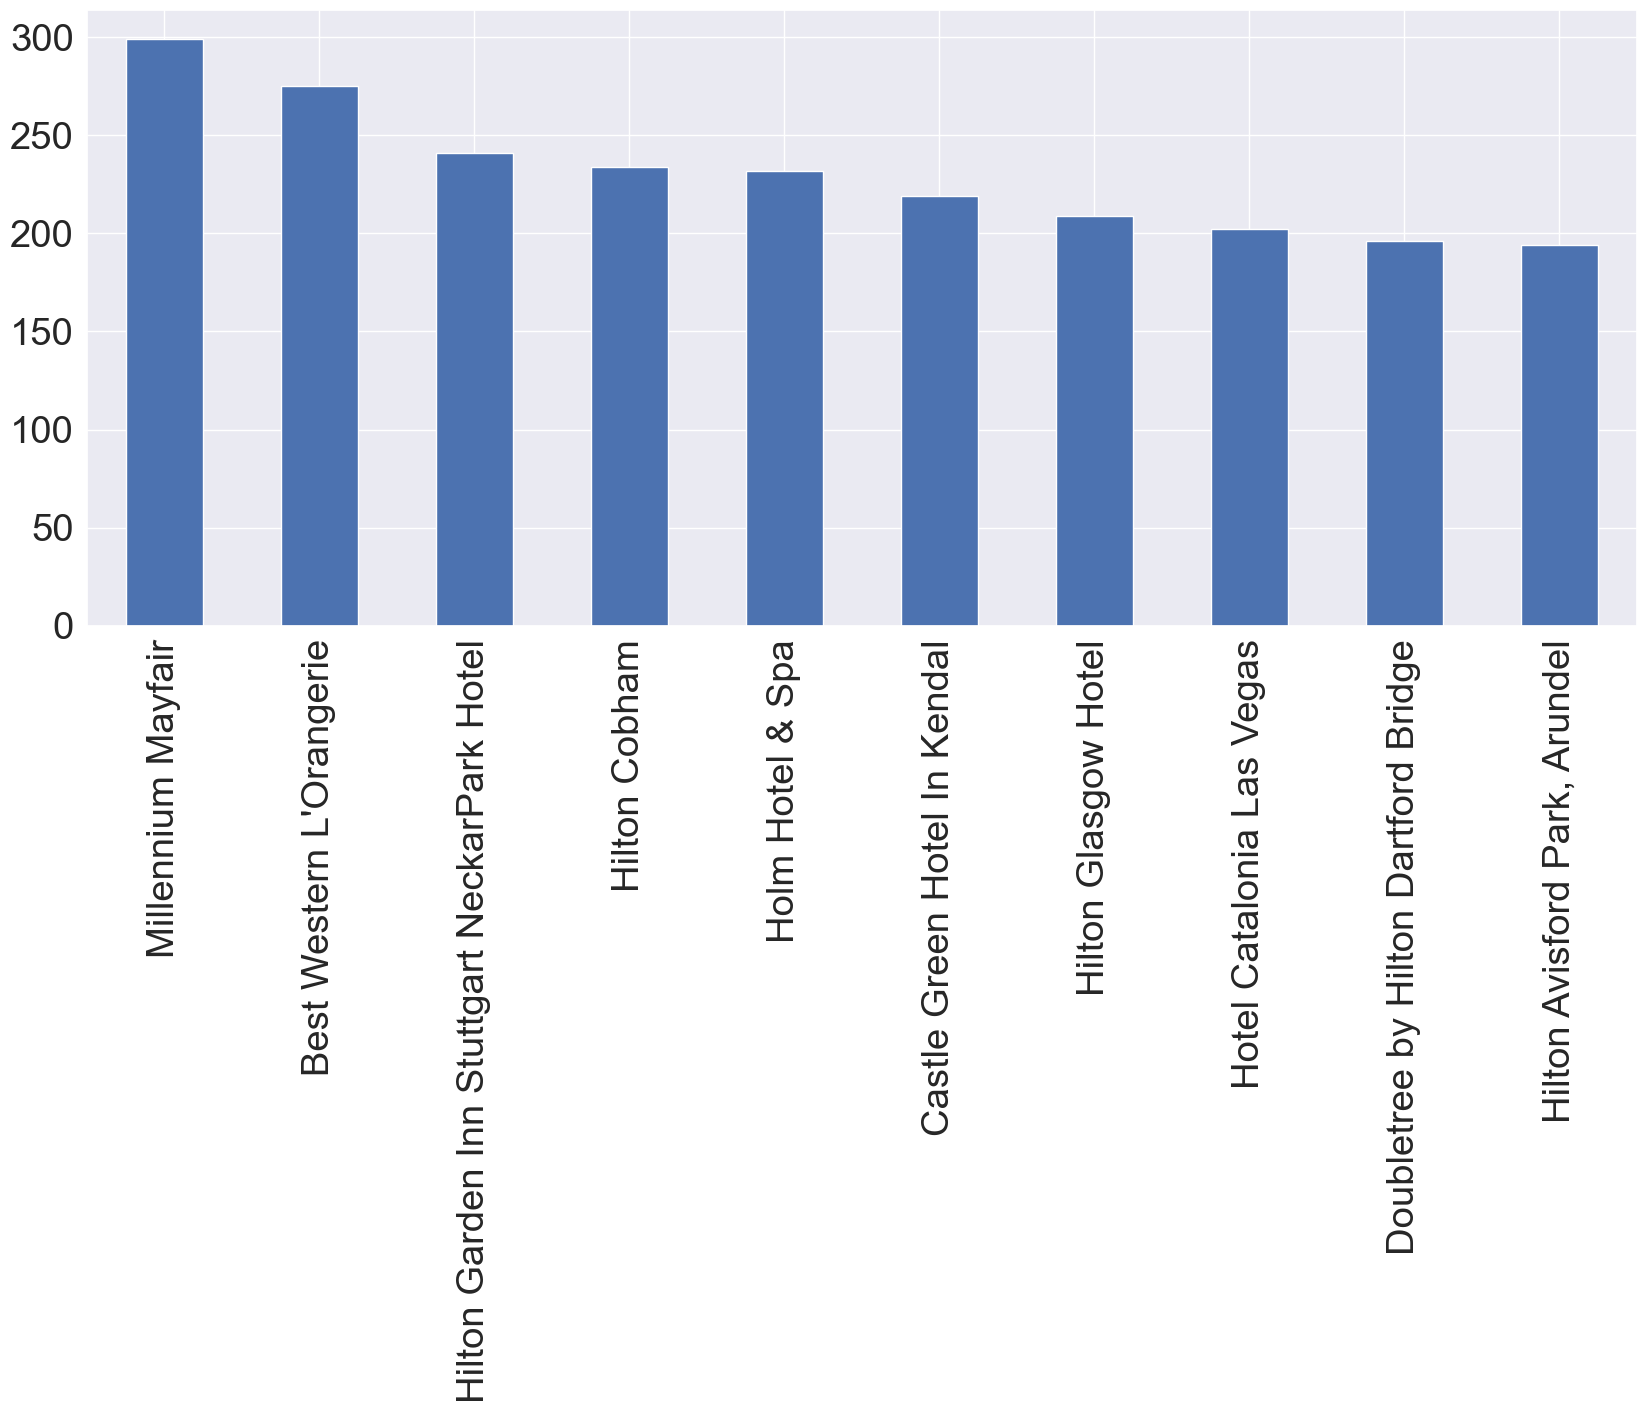

In [27]:
Hotel_counts = hotel['hotelname'].value_counts()
Hotel_counts[:10].plot(kind='bar',figsize=(20,8));

count of hotels per country

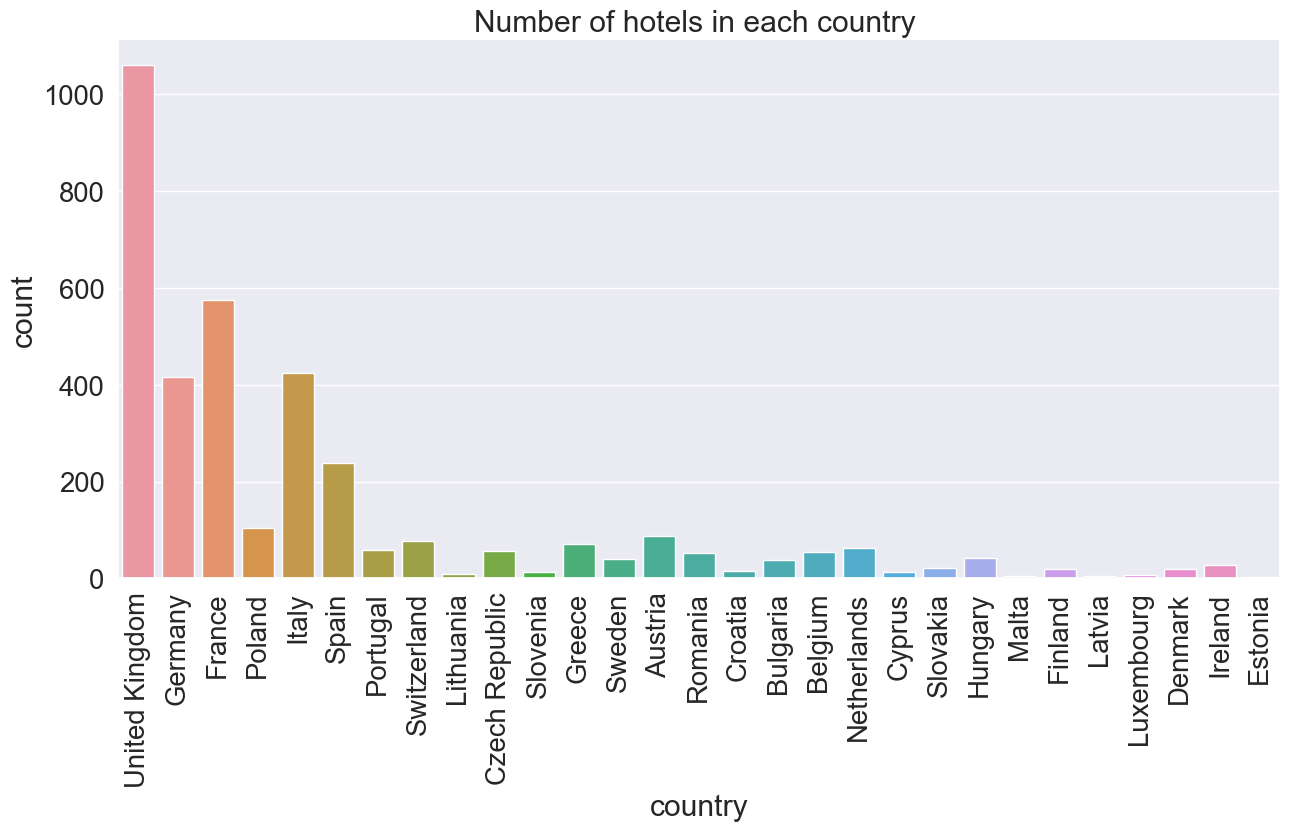

In [28]:
plot = hotel[["city","country"]].drop_duplicates()
plot.groupby('country').count()
sns.set(font_scale=1.8)
a4_dims=(15,7)
fig , ax =pyplot.subplots(figsize=a4_dims)
pyplot.xticks(rotation=90)
sns.countplot(ax = ax,x = "country",data=plot).set(title="Number of hotels in each country ");

# Recommender system And Model Training 


In [29]:
def citybased(city):                                                                                   #based on location
    hotel['city'] = hotel['city'].str.lower()
    citybase = hotel[hotel['city']==city.lower()]
    citybase = citybase.sort_values(by='starrating' , ascending=False)
    citybase.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    if (citybase.empty==0):
        hname=citybase[['hotelname','price','starrating','address','desciption','url']]
        return hname.head(10)
    else:
        print('No hotel Avialable')

In [30]:
input_city = input("Enter city name : ")
citybased(input_city)

Enter city name : paris


,hotelname,price,starrating,address,desciption,url
52546,Hotel Malte - Astotel,183,4,"63, Rue de Richelieu",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/hotel-malte-astote...
30092,Maxim Opera,94,4,"13, rue Geoffroy Marie",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/maxim-opera/hotel/...
57059,Hotel Le Pierre,192,4,"25, Rue Theodore de Banville",Air conditioning: ;Carpeting: ;Closet: ;Coffee...,https://www.agoda.com/en-gb/hotel-le-pierre/ho...
76461,Hilton Paris Charles De Gaulle Airport,90,4,RoissypoleRue De RomeBp16461,Air conditioning: ;Alarm clock: ;Blackout curt...,https://www.agoda.com/en-gb/hilton-paris-charl...
31485,Best Western Paris CDG Airport Hotel,94,4,"1, Allee du Verger",Air conditioning: ;Alarm clock: ;Bathrobes: ;C...,https://www.agoda.com/en-gb/best-western-paris...
33466,Mayfair Hotel,187,4,3 Rue Rouget De Lisle,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/mayfair-hotel/hote...
86485,Courtyard Paris Saint Denis,98,4,34 BD DE LA LIBERATION ZAC PLEYEL,Air conditioning: ;Alarm clock: ;Bathrobes: ;B...,https://www.agoda.com/en-gb/courtyard-paris-sa...
57556,LES JARDINS DE MADEMOISELLE & SPA,181,4,15 Rue Mademoiselle,Air conditioning: ;Alarm clock: ;Closet: ;Desk...,https://www.agoda.com/en-gb/les-jardins-de-mad...
26143,Hotel Des Saints Peres,236,4,"65, Saints Peres street",Air conditioning: ;Bathrobes: ;Desk: ;Free Wi-...,https://www.agoda.com/en-gb/hotel-des-saints-p...
85927,Melia Vendome,99,4,8 Rue Cambon,Additional toilet: ;Air conditioning: ;Bathrob...,https://www.agoda.com/en-gb/melia-vendome/hote...


In [31]:
def pop_citybased(city,number):                                                                # based on guest
    hotel['city'] = hotel['city'].str.lower()
    popbased = hotel[hotel['city']==city.lower()]
    popbased=popbased[popbased['guests_no']==number].sort_values(by='starrating',ascending=False)
    popbased.drop_duplicates(subset='hotelcode',keep="first",inplace=True)
    if popbased.empty==True:
        print("Sorry No Hotel Available ")
    else:
        return popbased[['hotelname','price','roomtype','guests_no','starrating','address','desciption','url']]
    

In [32]:
pop_citybased('paris',3)

,hotelname,price,roomtype,guests_no,starrating,address,desciption,url
74237,Secret De Paris Design Boutique Hotel,87,Eiffel Tower with shower,3,4,2 Rue De Parme,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/secret-de-paris-de...
36128,Novotel Suites Paris Expo Pte Versailles,83,Superior Suite,3,4,4 Boulevard Brune,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,https://www.agoda.com/en-gb/novotel-suites-par...
92761,Westside Arc de Triomphe Hotel,148,Standard Single Room,3,4,"36, rue Pierre Demours",Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/westside-arc-de-tr...
91633,Novotel Paris Les Halles Hotel,131,Junior Suite Queen Bed,3,4,"8, Place Marguerite de Navarre",Air conditioning: ;Bathrobes: ;Carpeting: ;Clo...,https://www.agoda.com/en-gb/novotel-paris-les-...
26080,Hotel Des Saints Peres,134,Classic Room,3,4,"65, Saints Peres street",Air conditioning: ;Desk: ;Free Wi-Fi in all ro...,https://www.agoda.com/en-gb/hotel-des-saints-p...
...,...,...,...,...,...,...,...,...
108630,Hotel Victor Hugo,130,Triple Room,3,2,104 avenue Victor Hugo,Air conditioning: ;Free Wi-Fi in all rooms!: ;...,https://www.agoda.com/en-gb/hotel-victor-hugo/...
16582,Du Mont Dore Hotel,95,Single,3,2,19 Rue Du Mont Dore,Air conditioning: ;Desk: ;Free bottled water: ...,https://www.agoda.com/en-gb/du-mont-dore-hotel...
16508,ibis budget Paris Porte d Italie Est,101,Double Room,3,2,20 rue Voltaire,Air conditioning: ;Daily housekeeping: ;Desk: ...,https://www.agoda.com/en-gb/ibis-budget-paris-...
109188,Nemours Hotel,74,Triple,3,2,8 Rue de Nemours,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,https://www.agoda.com/en-gb/nemours-hotel/hote...


In [33]:
hotel['desciption'] = hotel['desciption'].str.replace(': ;',',')

In [34]:
hotel['desciption']

0         Air conditioning,Alarm clock,Carpeting,Closet,...
1         Air conditioning,Alarm clock,Carpeting,Closet,...
2         Air conditioning,Alarm clock,Carpeting,Closet,...
3         Air conditioning,Alarm clock,Carpeting,Closet,...
4         Air conditioning,Alarm clock,Carpeting,Closet,...
                                ...                        
115079    Air conditioning,Blackout curtains,Closet,Coff...
115080    Air conditioning,Blackout curtains,Closet,Coff...
115081    Air conditioning,Blackout curtains,Closet,Coff...
115082    Air conditioning,Blackout curtains,Closet,Coff...
115083    Air conditioning,Blackout curtains,Closet,Coff...
Name: desciption, Length: 111906, dtype: object

In [35]:
def requirementbased(city,number,features):
    hotel['city']=hotel['city'].str.lower()
    hotel['desciption']=hotel['desciption'].str.lower()
    features=features.lower()
    features_token=word_tokenize(features)
    sw= stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_token if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = hotel[hotel['city']==city.lower()]
    reqbased = reqbased[reqbased['guests_no']==number].sort_values(by='starrating', ascending = False)
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    cos=[]
    
    for i in range(reqbased.shape[0]):
        temp_tokens= word_tokenize(reqbased['desciption'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))
    reqbased['similarity']=cos
    reqbased=reqbased.sort_values(by='similarity',ascending = False)
    reqbased.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    return reqbased[['hotelname','roomtype','price','guests_no','starrating','address','desciption','similarity','url']].head(10)

In [36]:
requirementbased('london',4,'I need a extra toilet and air condition')

,hotelname,roomtype,price,guests_no,starrating,address,desciption,similarity,url
1469,The Springfield Hotel,Double,138,4,2,154 Sussex Gardens,"additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/the-springfield-ho...
1321,Little Foxes Hotel,Single - 1 Person,117,4,3,"Charlwood Road, Crawley, West sussex","additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/little-foxes-hotel...
419,DoubleTree by Hilton Hotel London - Ealing,Queen Junior Suite,51,4,4,2-8 Hanger Lane,"additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/doubletree-by-hilt...
405,Lucky 8 Hotel,Quadruple Standard,192,4,4,York Road,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/lucky-8-hotel/hote...
1154,St Giles London - A St Giles Hotel,"Classic Twin Room, 2 Twin Beds",110,4,3,Bedford Avenue,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/st-giles-london-a-...
1165,Skyways Hotel,Single Room,84,4,3,"19-21 London Road, Slough","additional toilet,air conditioning,closet,coff...",2,https://www.agoda.com/en-gb/skyways-hotel/hote...
358,The Level at Melia White House,Deluxe The Level Room King Bed,192,4,4,Albany Street,"air conditioning,alarm clock,bathrobes,blackou...",2,https://www.agoda.com/en-gb/the-level-at-melia...
1180,The House Of Toby London,Deluxe Quadruple,103,4,3,Swinton Street,"additional toilet,air conditioning,carpeting,c...",2,https://www.agoda.com/en-gb/the-house-of-toby-...
444,Simply Rooms & Suites Hotel,Suite Studio,141,4,4,21 Avonmore Road,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/simply-rooms-suite...
432,Millennium Bailey's,Deluxe Twin Room,44,4,4,140 Gloucester Road,"additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/millennium-bailey-...


In [37]:
def requirementbased(city,number,features,price):
    hotel['city']=hotel['city'].str.lower()
    hotel['desciption']=hotel['desciption'].str.lower()
    features=features.lower()
    features_token=word_tokenize(features)
    sw= stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in features_token if not w in sw}
    f_set = set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    reqbased = hotel[hotel['city']==city.lower()]
    reqbased = reqbased[reqbased['guests_no']==number].sort_values(by='starrating', ascending = False)
    reqbased = reqbased[reqbased['price']<=price].sort_values(by='starrating',ascending = False)
    reqbased = reqbased.set_index(np.arange(reqbased.shape[0]))
    cos=[]
    
    for i in range(reqbased.shape[0]):
        temp_tokens= word_tokenize(reqbased['desciption'][i])
        temp1_set = {w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        cos.append(len(rvector))
    reqbased['similarity']=cos
    reqbased=reqbased.sort_values(by='similarity',ascending = False)
    reqbased.drop_duplicates(subset='hotelcode',keep='first',inplace=True)
    return reqbased[['hotelname','roomtype','price','guests_no','starrating','address','desciption','similarity','url']].head(10)
    

In [38]:
requirementbased('london',4,'I need a extra toilet and air condition',90)

,hotelname,roomtype,price,guests_no,starrating,address,desciption,similarity,url
121,Hilton London Olympia Hotel,Double Hilton Suite,81,4,4,380 Kensington High Street,"additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/hilton-london-olym...
293,"Baylis House Hotel, Sure Hotel Collection by B...",Suite-1 King Bed,87,4,3,"Stoke Poges Lane, Slough","air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/baylis-house-hotel...
204,Washington Mayfair Hotel,Superior Room,87,4,4,5 Curzon Street,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/washington-mayfair...
96,"100 Queen's Gate Hotel London, Curio Collectio...",Queensgate Luxury Queen Room,81,4,4,100 Queen's Gate,"air conditioning,alarm clock,closet,coffee/tea...",2,https://www.agoda.com/en-gb/100-queen-s-gate-h...
159,Simply Rooms & Suites Hotel,Other,83,4,4,21 Avonmore Road,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/simply-rooms-suite...
208,The Manor Hotel Heathrow,Petite Double Room,88,4,4,"Village Green, Datchet,","additional bathroom,additional toilet,air cond...",2,https://www.agoda.com/en-gb/the-manor-hotel-he...
295,Skyways Hotel,Single Room,84,4,3,"19-21 London Road, Slough","additional toilet,air conditioning,closet,coff...",2,https://www.agoda.com/en-gb/skyways-hotel/hote...
44,Holiday Inn London Elstree,2 Single Beds Non-smoking,87,4,4,Barnet By Pass,"additional toilet,air conditioning,carpeting,c...",2,https://www.agoda.com/en-gb/holiday-inn-london...
51,Renaissance London Heathrow Hotel,"Standard Room, Guest room, 2 Twin/Single Bed(s)",45,4,4,Bath Road,"air conditioning,free wi-fi in all rooms!,in-r...",2,https://www.agoda.com/en-gb/renaissance-london...
52,DoubleTree by Hilton Hotel London - Ealing,Queen Junior Suite,70,4,4,2-8 Hanger Lane,"additional toilet,air conditioning,alarm clock...",2,https://www.agoda.com/en-gb/doubletree-by-hilt...


# User Input

In [40]:
city_input = input("Enter The City : ")
guest_input = int(input("Enter the number of guest : "))
description_input = input("Enter your requirement : ")
price_input = int(input("Enter the maximum amount in your budget : "))

requirementbased(city_input,guest_input,description_input,price_input)

Enter The City : paris
Enter the number of guest : 2
Enter your requirement : one bedroom
Enter the maximum amount in your budget : 200


,hotelname,roomtype,price,guests_no,starrating,address,desciption,similarity,url
1064,Hotel Wilson Opera,Adjacent Rooms,74,2,3,10 rue de Stokholm,"air conditioning,alarm clock,carpeting,closet,...",1,https://www.agoda.com/en-gb/hotel-wilson-opera...
632,Hotel Cordelia,Adjoining Rooms,90,2,3,Greffulhe street 11,"air conditioning,closet,coffee/tea maker,daily...",1,https://www.agoda.com/en-gb/hotel-cordelia/hot...
1230,Villa Saint Honore,Ambassador Suite,98,2,3,Rue Saint-Philippe du Roule,"air conditioning,bathrobes,carpeting,closet,cl...",1,https://www.agoda.com/en-gb/villa-saint-honore...
850,Hotel Du Vieux Marais,Twin Room,199,2,3,8 rue du Platre,"air conditioning,alarm clock,carpeting,closet,...",1,https://www.agoda.com/en-gb/hotel-du-vieux-mar...
1210,MidNight Hotel Paris,Two-Bedroom Apartment ( 5 Adults ),92,2,3,133 rue du Faubourg St-Denis,"air conditioning,alarm clock,closet,coffee/tea...",1,https://www.agoda.com/en-gb/midnight-hotel-par...
0,Hotel Du Temps,Double Standard,95,2,4,11 Rue de Montholon,"air conditioning,closet,clothes rack,complimen...",0,https://www.agoda.com/en-gb/hotel-du-temps_2/h...
939,New Hotel Candide,Single Room,91,2,3,3 Rue Petion,"air conditioning,closet,coffee/tea maker,daily...",0,https://www.agoda.com/en-gb/new-hotel-candide/...
935,Le Theatre,Superior Single Room,125,2,3,48 Boulevard Marechal de Lattre de Tassigny,"air conditioning,alarm clock,closet,coffee/tea...",0,https://www.agoda.com/en-gb/le-theatre/hotel/p...
941,Hotel Colisee,Triple Room,190,2,3,Rue du Colisee,"air conditioning,desk,free bottled water,free ...",0,https://www.agoda.com/en-gb/hotel-colisee/hote...
931,Hotel Scarlett,classic,74,2,3,Rue Jouye-Rouve,"air conditioning,carpeting,closet,desk,dressin...",0,https://www.agoda.com/en-gb/hotel-scarlett/hot...
